#Importar arquivos

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!cp /content/drive/MyDrive/desafio-2.zip /content

In [3]:
!unzip desafio-2.zip

Archive:  desafio-2.zip
  inflating: details.txt             
  inflating: test.csv                
  inflating: train.csv               


#Etapa I

##Bibliotecas necessárias

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from tqdm import tqdm
import time

##Carregando a base de dados

In [6]:
dados = pd.read_csv('/content/train.csv')
dados_modelo = dados.copy()

### Informações sobre o Data Frame
PassengerId: Número de identificação do passageiro;
Survived: Informa se o passageiro sobreviveu ao desastre;
0 = Não;
1 = Sim;
Pclass: Classe do bilhete;
1 = 1ª Classe;
2 = 2ª Classe;
3 = 3ª Classe;
Name: Nome do passageiro;
Sex: Sexo do passageiro;
Age: Idade do passageiro;
SibSp: Quantidade de cônjuges e irmãos a bordo;
Parch: Quantidade de pais e filhos a bordo;
Ticket: Número da passagem;
Fare: Preço da Passagem;
Cabin: Número da cabine do passageiro;
Embarked: Porto no qual o passageiro embarcou;
C = Cherbourg;
Q = Queenstown;
S = Southampton;

##Tratar base de dados

In [ ]:
dados.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### Verificar Dados Dulicados

In [7]:
duplicados = dados.duplicated()
duplicados.sum()

0

###Normalização

In [8]:
dados.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
dados1 = dados.copy()
dados1['Age'] = dados['Age'].fillna((dados['Age'].median()))
dados1 = dados1.dropna(subset='Embarked')
dados1 = dados1.drop('Cabin', axis=1)
dados1 = dados1.reset_index(drop = True)
dados1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### Tratamento de dados categóricos

#### Frequencia dos dados categóricos

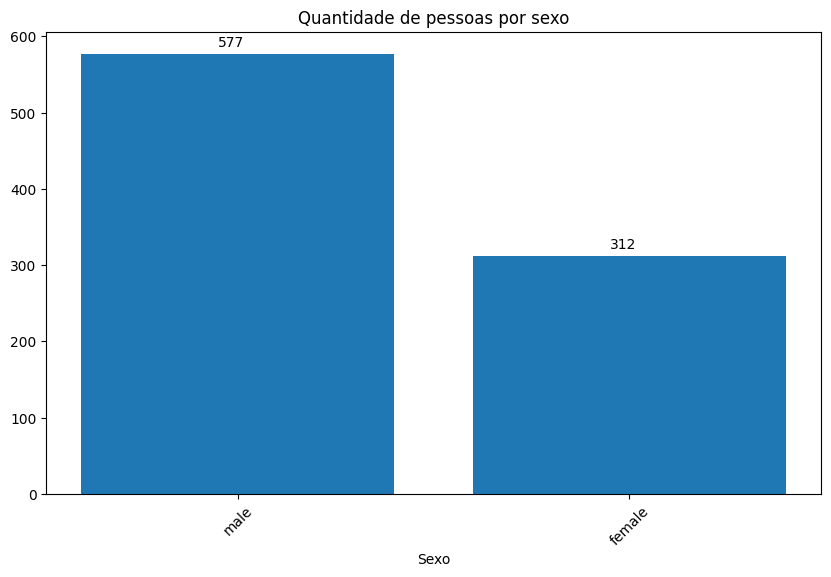

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(dados1.Sex.value_counts().index, dados1.Sex.value_counts().values)

for i, count in enumerate(dados1.Sex.value_counts()):
    plt.text(i -0.05, count + 10, str(count))

plt.title('Quantidade de pessoas por sexo')
plt.xlabel('Sexo')
plt.xticks(rotation=45)
plt.show()

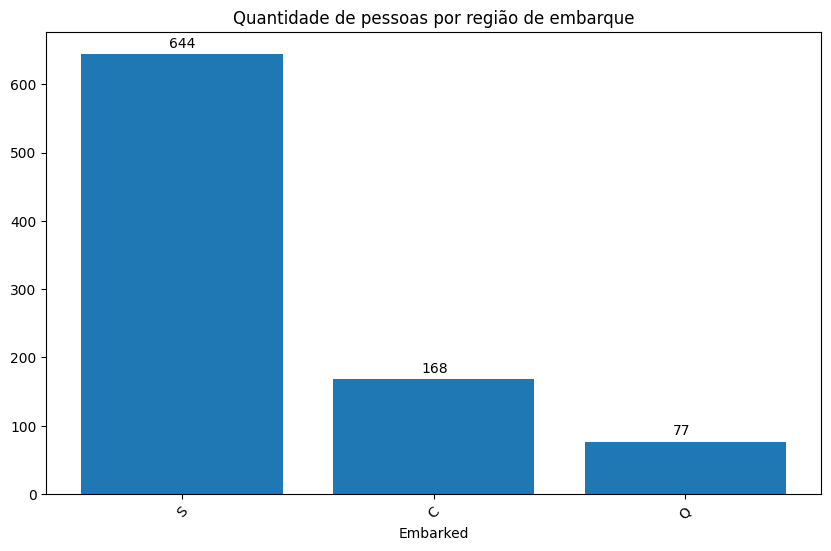

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(dados1.Embarked.value_counts().index, dados1.Embarked.value_counts().values)

for i, count in enumerate(dados1.Embarked.value_counts()):
    plt.text(i -0.05, count + 10, str(count))

plt.title('Quantidade de pessoas por região de embarque')
plt.xlabel('Embarked')
plt.xticks(rotation=45)
plt.show()

#### Definindo um índice para cada caso

In [10]:
label_enconder = LabelEncoder()
labels_sex = label_enconder.fit_transform(dados1.Sex)
labels_sex

dados2 = dados1.copy()
dados2['Sexo'] = labels_sex
dados2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sexo
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


In [11]:
label_enconder = LabelEncoder()
labels_Embarked = label_enconder.fit_transform(dados2.Embarked)
labels_Embarked

dados3 = dados2.copy()
dados3['Embarque'] = labels_Embarked
dados3.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sexo,Embarque
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,2


#### Códificando o índice com one-hot

In [12]:
one_hot_enconder_e = OneHotEncoder()
feature_array_e = one_hot_enconder_e.fit_transform(dados3[['Embarque']]).toarray()
features_df_e = pd.DataFrame(feature_array_e, columns = ['S',	'C', 'Q'])
features_df_e.head()

,S,C,Q
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


#### Concatenando o DataFrame novo e antigo

In [13]:
dados4 = pd.concat([dados3, features_df_e], axis = 1)
# dados3 = pd.concat([dados3, features_df_s], axis = 1)
dados4.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sexo,Embarque,S,C,Q
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,2,0.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,1.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,2,0.0,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,2,0.0,0.0,1.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,2,0.0,0.0,1.0


In [14]:
dados5 = dados4.drop(['Sex', 'Embarked','Embarque', 'Name', 'Ticket', 'PassengerId'], axis= 1)
dados5.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sexo,S,C,Q
0,0,3,22.0,1,0,7.2500,1,0.0,0.0,1.0
1,1,1,38.0,1,0,71.2833,0,1.0,0.0,0.0
2,1,3,26.0,0,0,7.9250,0,0.0,0.0,1.0
3,1,1,35.0,1,0,53.1000,0,0.0,0.0,1.0
4,0,3,35.0,0,0,8.0500,1,0.0,0.0,1.0


### Visualização gráfica dos dados categóricos

##### Visualização

array([[<Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>,
        <Axes: title={'center': 'Fare'}>],
       [<Axes: title={'center': 'Sexo'}>, <Axes: title={'center': 'S'}>,
        <Axes: title={'center': 'C'}>],
       [<Axes: title={'center': 'Q'}>, <Axes: >, <Axes: >]], dtype=object)

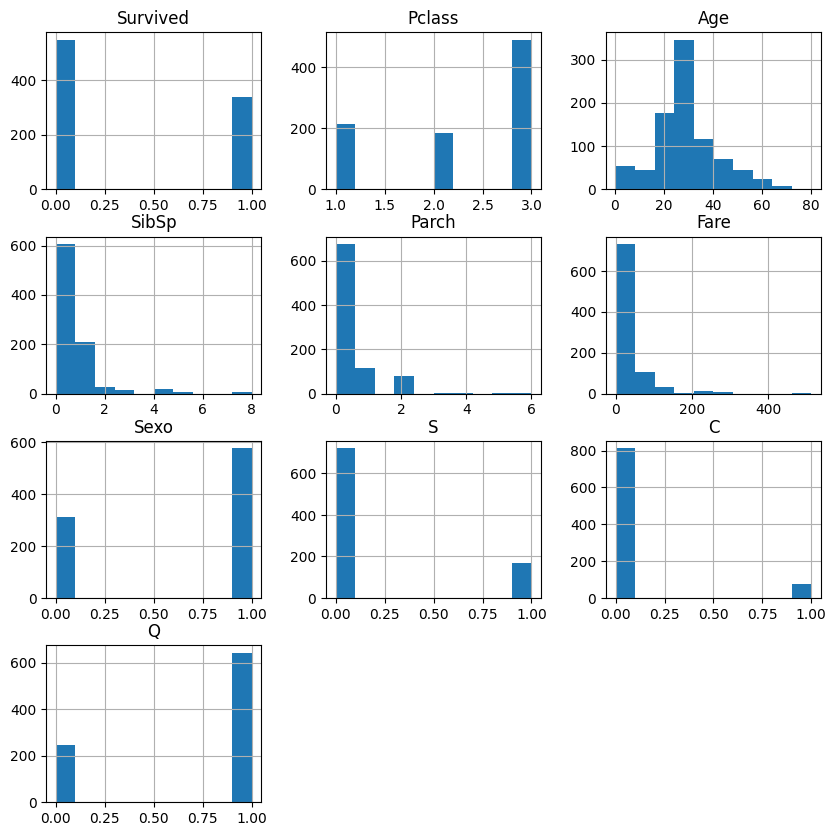

In [15]:
dados5.hist(figsize= (10, 10))

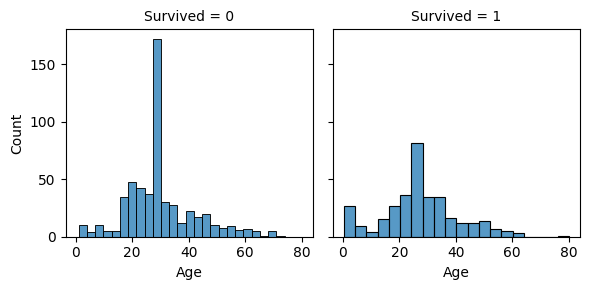

In [16]:
sobreviventes = sns.FacetGrid(dados5, col='Survived', despine=False)
sobreviventes.map(sns.histplot, 'Age')

### Tratamento de outliers

#### Identificando outliers

In [ ]:
dados5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Age       889 non-null    float64
 3   SibSp     889 non-null    int64  
 4   Parch     889 non-null    int64  
 5   Fare      889 non-null    float64
 6   Sexo      889 non-null    int64  
 7   S         889 non-null    float64
 8   C         889 non-null    float64
 9   Q         889 non-null    float64
dtypes: float64(5), int64(5)
memory usage: 69.6 KB


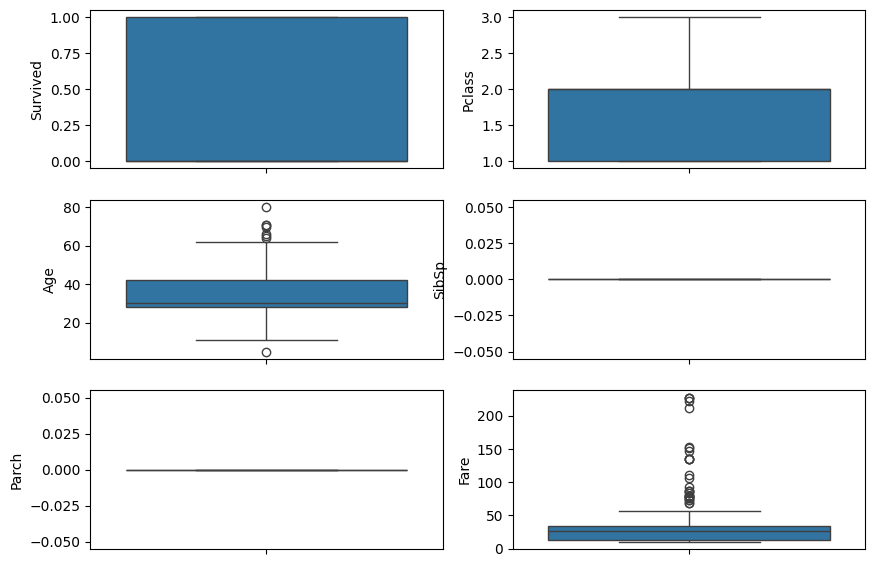

In [ ]:
f, graficos = plt.subplots (3, 2, figsize = (10,7))
linha = 0
coluna = 0

for i in dados6.drop(['S', 'C', 'Q', 'Sexo'], axis = 1):
  sns.boxplot(data = dados6, y=i, ax=graficos[linha][coluna])
  plt.ylabel(i)
  coluna += 1
  if coluna == 2:
    linha += 1
    coluna = 0

plt.show()

In [17]:
dados6 = dados5.copy()
dados6.drop(dados6.loc[dados6['Parch'] > 0.5].index, inplace = True)
dados6.drop(dados6.loc[dados6['SibSp'] > 0.5].index, inplace = True)
dados6.drop(dados6.loc[dados6['Fare'] > 400].index, inplace = True)
dados6.drop(dados6.loc[dados6['Fare'] < 10].index, inplace = True)

### Relação entre as features

#### Definindo correlação

In [18]:
lista_corr = ['Survived',	'Pclass',	'Age',	'SibSp',	'Parch',	'Fare', 'Sexo', 'S', 'C', 'Q']
corr_dados = dados5[lista_corr].corr()
display(corr_dados)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sexo,S,C,Q
Survived,1.000000,-0.335549,-0.069822,-0.034040,0.083151,0.255290,-0.541585,0.169966,0.004536,-0.151777
Pclass,-0.335549,1.000000,-0.336512,0.081656,0.016824,-0.548193,0.127741,-0.245733,0.220558,0.076466
Age,-0.069822,-0.336512,1.000000,-0.232543,-0.171485,0.093707,0.086506,0.032098,-0.030436,-0.008964
SibSp,-0.034040,0.081656,-0.232543,1.000000,0.414542,0.160887,-0.116348,-0.060074,-0.026692,0.069438
Parch,0.083151,0.016824,-0.171485,0.414542,1.000000,0.217532,-0.247508,-0.011588,-0.081585,0.061512
Fare,0.255290,-0.548193,0.093707,0.160887,0.217532,1.000000,-0.179958,0.270731,-0.116684,-0.163758
Sexo,-0.541585,0.127741,0.086506,-0.116348,-0.247508,-0.179958,1.000000,-0.084520,-0.075217,0.121405
S,0.169966,-0.245733,0.032098,-0.060074,-0.011588,0.270731,-0.084520,1.000000,-0.148646,-0.782613
C,0.004536,0.220558,-0.030436,-0.026692,-0.081585,-0.116684,-0.075217,-0.148646,1.000000,-0.499261
Q,-0.151777,0.076466,-0.008964,0.069438,0.061512,-0.163758,0.121405,-0.782613,-0.499261,1.000000


<Axes: >

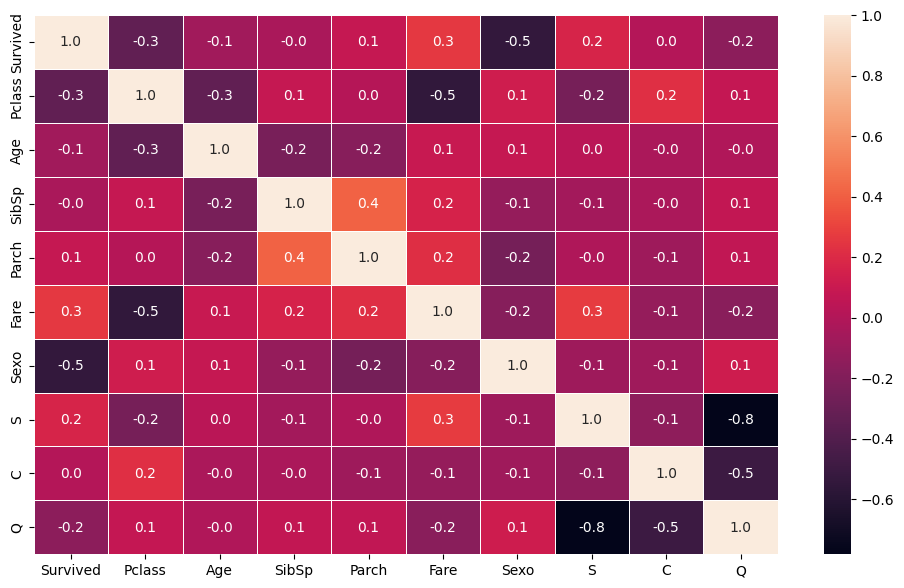

In [ ]:
plt.figure(figsize = (12, 7))
sns.heatmap(corr_dados, annot = True, fmt=".1f", linewidths=.6)

#### Análise por gráfico de barras

Text(0.5, 1.0, 'Sobreviventes por sexo')

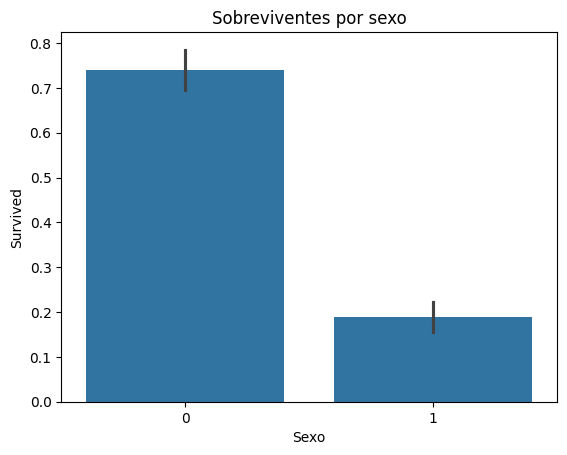

In [ ]:
sns.barplot(x='Sexo', y='Survived', data=dados5)
plt.title('Sobreviventes por sexo')

Text(0.5, 1.0, 'Sobreviventes de cada região de embarque')

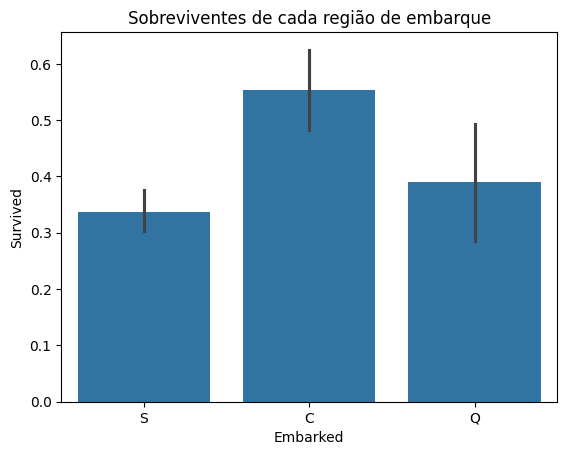

In [ ]:
sns.barplot(x='Embarked', y='Survived', data=dados4)
plt.title('Sobreviventes de cada região de embarque')

Text(0.5, 1.0, 'Quantidade de sobreviventes de cada classe')

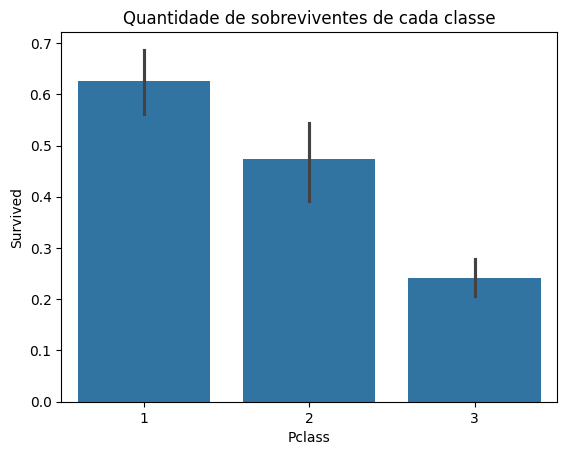

In [ ]:
sns.barplot(x='Pclass', y='Survived', data=dados5)
plt.title('Quantidade de sobreviventes de cada classe')

#Etapa II

##Tratamento da função teste

###Normalização

In [ ]:
dados_teste = pd.read_csv('/content/test.csv')
valores_Y = pd.read_csv('/content/drive/MyDrive/y_test.csv')

In [47]:
dados_teste1 = dados_teste.copy()
dados_teste1['Age'] = dados_teste['Age'].fillna((dados_teste['Age'].median()))
dados_teste1 = dados_teste1.drop('Cabin', axis=1)
dados_teste1 = dados_teste1.reset_index(drop = True)
dados_teste1.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [48]:
dados_teste1['Embarked'] = dados_teste1['Embarked'].fillna((dados_teste1['Embarked'].median))
fare_median = dados_teste['Fare'].median()
dados_teste1['Fare'] = dados_teste['Fare'].astype(float)
dados_teste1['Fare'].fillna(fare_median, inplace=True)
dados_teste1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


###Tratamento de dados categóricos

In [49]:
label_enconder_test = LabelEncoder()
labels_sex_teste = label_enconder_test.fit_transform(dados_teste1.Sex)
labels_sex_teste

dados_teste2 = dados_teste1.copy()
dados_teste2['Sexo'] = labels_sex_teste
dados_teste2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sexo
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0


In [50]:
label_enconder_teste = LabelEncoder()
labels_Embarked_teste = label_enconder_teste.fit_transform(dados_teste2.Embarked)
labels_Embarked_teste

dados_teste3 = dados_teste2.copy()
dados_teste3['Embarque'] = labels_Embarked_teste
dados_teste3.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sexo,Embarque
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0,2


###Codificando o one-hot

In [51]:
one_hot_enconder_e_teste = OneHotEncoder()
feature_array_e_teste = one_hot_enconder_e_teste.fit_transform(dados_teste3[['Embarque']]).toarray()
features_df_e_teste = pd.DataFrame(feature_array_e_teste, columns = ['S',	'C', 'Q'])
features_df_e_teste.head()

,S,C,Q
0,0.0,1.0,0.0
1,0.0,0.0,1.0
2,0.0,1.0,0.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


###Concatenando o DataFrame novo e antigo

In [52]:
dados_teste4 = pd.concat([dados_teste3, features_df_e_teste], axis = 1)
dados_teste4.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sexo,Embarque,S,C,Q
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1,1,0.0,1.0,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0,2,0.0,0.0,1.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1,1,0.0,1.0,0.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1,2,0.0,0.0,1.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0,2,0.0,0.0,1.0


In [71]:
dados_teste5 = dados_teste4.drop(['Sex', 'Embarked','Embarque', 'Name', 'Ticket', 'PassengerId'], axis= 1)
dados_teste5.shape

(418, 9)

#Etapa III

In [54]:
dados_teste5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  418 non-null    int64  
 1   Age     418 non-null    float64
 2   SibSp   418 non-null    int64  
 3   Parch   418 non-null    int64  
 4   Fare    418 non-null    float64
 5   Sexo    418 non-null    int64  
 6   S       418 non-null    float64
 7   C       418 non-null    float64
 8   Q       418 non-null    float64
dtypes: float64(5), int64(4)
memory usage: 29.5 KB


In [72]:
dados6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 222 entries, 6 to 887
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  222 non-null    int64  
 1   Pclass    222 non-null    int64  
 2   Age       222 non-null    float64
 3   SibSp     222 non-null    int64  
 4   Parch     222 non-null    int64  
 5   Fare      222 non-null    float64
 6   Sexo      222 non-null    int64  
 7   S         222 non-null    float64
 8   C         222 non-null    float64
 9   Q         222 non-null    float64
dtypes: float64(5), int64(5)
memory usage: 19.1 KB


### Bibliotecas necessárias

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

###Separação de variáveis

In [ ]:
X = dados6.drop('Survived', axis=1)
y = dados6['Survived']

###Modelo de regressão logística

In [ ]:
model = LogisticRegression(random_state = 42)
model.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [ ]:
valores_Y

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
taxa_de_acerto = model.score(dados_teste5, valores_Y['Survived'])
print('porcentagem de acerto:', taxa_de_acerto*100)

porcentagem de acerto: 99.52153110047847


### Modelo Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model_RF = RandomForestClassifier(random_state = 42)
model_RF.fit(X, y)

RandomForestClassifier(random_state=42)

In [ ]:
taxa_de_acerto_RF = model_RF.score(dados_teste5, valores_Y['Survived'])
print('porcentagem de acerto:', taxa_de_acerto_RF*100)

porcentagem de acerto: 94.73684210526315


#Modelo para preenchimento de dados

###One hot das features categóricas

In [ ]:
dados_modelo = dados_modelo.drop('Cabin', axis=1)
dados_modelo = dados_modelo.dropna(subset='Embarked')

In [ ]:
label_enconder = LabelEncoder()
labels_sex = label_enconder.fit_transform(dados_modelo.Sex)
labels_sex

dados_modelo = dados_modelo.copy()
dados_modelo['Sexo'] = labels_sex
dados_modelo.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sexo
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


In [ ]:
dados_modelo1 = dados_modelo.copy()
label_enconder = LabelEncoder()
labels_Embarked = label_enconder.fit_transform(dados_modelo.Embarked)
labels_Embarked

dados_modelo1 = dados_modelo1.copy()
dados_modelo1['Embarque'] = labels_Embarked
dados_modelo1 = dados_modelo1.reset_index(drop = True)
dados_modelo1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sexo,Embarque
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,2


In [ ]:
one_hot_enconder_e = OneHotEncoder()
feature_array_e = one_hot_enconder_e.fit_transform(dados_modelo1[['Embarque']]).toarray()
features_df_e = pd.DataFrame(feature_array_e, columns = ['S',	'C', 'Q'])
features_df_e.head()

,S,C,Q
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


In [ ]:
dados_modelo2 = pd.concat([dados_modelo1, features_df_e], axis = 1)
# dados3 = pd.concat([dados3, features_df_s], axis = 1)
dados_modelo2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sexo,Embarque,S,C,Q
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,2,0.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,1.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,2,0.0,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,2,0.0,0.0,1.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,2,0.0,0.0,1.0


In [ ]:
dados_modelo3 = dados_modelo2.drop(['Sex', 'Embarked','Embarque', 'Name', 'Ticket', 'PassengerId'], axis= 1)
dados_modelo3.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sexo,S,C,Q
0,0,3,22.0,1,0,7.2500,1,0.0,0.0,1.0
1,1,1,38.0,1,0,71.2833,0,1.0,0.0,0.0
2,1,3,26.0,0,0,7.9250,0,0.0,0.0,1.0
3,1,1,35.0,1,0,53.1000,0,0.0,0.0,1.0
4,0,3,35.0,0,0,8.0500,1,0.0,0.0,1.0


In [ ]:
dados_faltantes = dados_modelo3[dados_modelo3.isnull().any(axis=1)]

dados_completos = dados_modelo3.dropna()

In [ ]:
dados_faltantes1 = dados_faltantes.drop(['Age'], axis=1)

In [ ]:
dados_faltantes1

,Survived,Pclass,SibSp,Parch,Fare,Sexo,S,C,Q
5,0,3,0,0,8.4583,1,0.0,1.0,0.0
17,1,2,0,0,13.0000,1,0.0,0.0,1.0
19,1,3,0,0,7.2250,0,1.0,0.0,0.0
26,0,3,0,0,7.2250,1,1.0,0.0,0.0
28,1,3,0,0,7.8792,0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
857,0,3,0,0,7.2292,1,1.0,0.0,0.0
861,0,3,8,2,69.5500,0,0.0,0.0,1.0
866,0,3,0,0,9.5000,1,0.0,0.0,1.0
876,0,3,0,0,7.8958,1,0.0,0.0,1.0


###Treinamento da IA para preenchimento de dados

In [67]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [ ]:
parametros = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3],
    'max_features': [1,2, 'sqrt', 'log2'],
    'n_jobs': [None, 1, 2, 3],
    'random_state': [42],
}

In [ ]:
X_MP = dados_completos.drop(['Age'], axis=1)
y_mp = dados_completos['Age']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_MP, y_mp, test_size = 0.3, random_state=42)

In [ ]:
model_p = RandomForestRegressor(random_state = 42)
model_p.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
predicao_model = model_p.predict(X_train)
taxa_de_acerto = metrics.r2_score(y_train, predicao_model)
print('porcentagem de acerto:', taxa_de_acerto*100)

porcentagem de acerto: 74.35070085925291


In [ ]:
previsoes = model_p.predict(dados_faltantes1)

In [ ]:
dados_previstos = dados_faltantes1.copy()
dados_previstos['Age'] = previsoes

###Unir dados previstos com dados completos

In [ ]:
dados_previstos

,Survived,Pclass,SibSp,Parch,Fare,Sexo,S,C,Q,Age
5,0,3,0,0,8.4583,1,0.0,1.0,0.0,33.896851
17,1,2,0,0,13.0000,1,0.0,0.0,1.0,39.736784
19,1,3,0,0,7.2250,0,1.0,0.0,0.0,19.276250
26,0,3,0,0,7.2250,1,1.0,0.0,0.0,34.963024
28,1,3,0,0,7.8792,0,0.0,1.0,0.0,19.825000
...,...,...,...,...,...,...,...,...,...,...
857,0,3,0,0,7.2292,1,1.0,0.0,0.0,26.268361
861,0,3,8,2,69.5500,0,0.0,0.0,1.0,18.440976
866,0,3,0,0,9.5000,1,0.0,0.0,1.0,23.514552
876,0,3,0,0,7.8958,1,0.0,0.0,1.0,26.609219


In [ ]:
dados_previstos1 = dados_previstos[['Survived',	'Pclass',	'Age',	'SibSp',	'Parch',	'Fare',	'Sexo',	'S',	'C',	'Q']]
dados_previstos1

,Survived,Pclass,Age,SibSp,Parch,Fare,Sexo,S,C,Q
5,0,3,33.896851,0,0,8.4583,1,0.0,1.0,0.0
17,1,2,39.736784,0,0,13.0000,1,0.0,0.0,1.0
19,1,3,19.276250,0,0,7.2250,0,1.0,0.0,0.0
26,0,3,34.963024,0,0,7.2250,1,1.0,0.0,0.0
28,1,3,19.825000,0,0,7.8792,0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
857,0,3,26.268361,0,0,7.2292,1,1.0,0.0,0.0
861,0,3,18.440976,8,2,69.5500,0,0.0,0.0,1.0
866,0,3,23.514552,0,0,9.5000,1,0.0,0.0,1.0
876,0,3,26.609219,0,0,7.8958,1,0.0,0.0,1.0


In [ ]:
dados_totais = pd.concat([dados_previstos1, dados_completos], ignore_index=True)
dados_totais

,Survived,Pclass,Age,SibSp,Parch,Fare,Sexo,S,C,Q
0,0,3,33.896851,0,0,8.4583,1,0.0,1.0,0.0
1,1,2,39.736784,0,0,13.0000,1,0.0,0.0,1.0
2,1,3,19.276250,0,0,7.2250,0,1.0,0.0,0.0
3,0,3,34.963024,0,0,7.2250,1,1.0,0.0,0.0
4,1,3,19.825000,0,0,7.8792,0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
884,0,3,39.000000,0,5,29.1250,0,0.0,1.0,0.0
885,0,2,27.000000,0,0,13.0000,1,0.0,0.0,1.0
886,1,1,19.000000,0,0,30.0000,0,0.0,0.0,1.0
887,1,1,26.000000,0,0,30.0000,1,1.0,0.0,0.0


###Remoção dos outlier do DF final

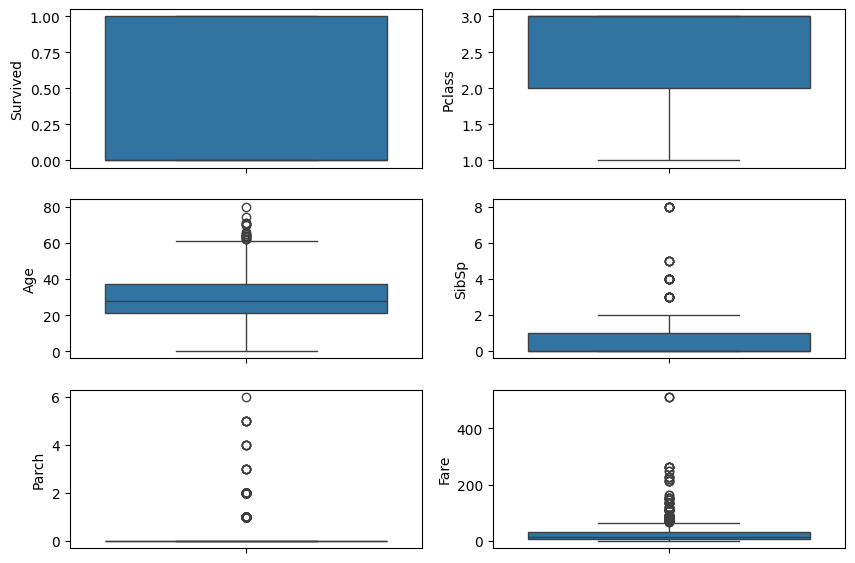

In [ ]:
f, graficos = plt.subplots (3, 2, figsize = (10,7))
linha = 0
coluna = 0

for i in dados_totais.drop(['S', 'C', 'Q', 'Sexo'], axis = 1):
  sns.boxplot(data = dados_totais, y=i, ax=graficos[linha][coluna])
  plt.ylabel(i)
  coluna += 1
  if coluna == 2:
    linha += 1
    coluna = 0

plt.show()

In [ ]:
dados_totais1 = dados_totais.copy()
dados_totais1.drop(dados_totais1.loc[dados_totais1['Parch'] > 0.5].index, inplace = True)
dados_totais1.drop(dados_totais1.loc[dados_totais1['SibSp'] > 0.5].index, inplace = True)
dados_totais1.drop(dados_totais1.loc[dados_totais1['Fare'] > 400].index, inplace = True)
dados_totais1.drop(dados_totais1.loc[dados_totais1['Fare'] < 10].index, inplace = True)

In [88]:
dados_totais1['Survived'].value_counts()

Survived
0    124
1     98
Name: count, dtype: int64

### Teste do modelo com dados preenchidos automaticamente

In [93]:
X_T1 = dados_totais1.drop('Survived', axis=1)
y_t1 = dados_totais1['Survived']

In [94]:
model_t1 = LogisticRegression(random_state = 42)
model_t1.fit(X_T1, y_t1)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [95]:
dados_teste5.shape

(418, 9)

In [96]:
predicao_model = model_t1.predict(dados_teste5)

In [97]:
cf_matrix = confusion_matrix(valores_Y['Survived'], predicao_model)
cf_matrix

array([[264,   2],
       [  0, 152]])

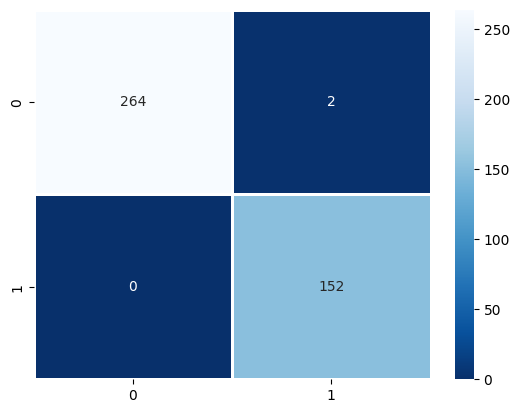

In [101]:
sns.heatmap(cf_matrix, cmap='Blues_r', annot=True, linewidth=1, fmt='d')
plt.show()

###Armazendo modelo com suas features em uma variável

In [108]:
variaveis = X_T1.columns.tolist()

model_e_variaveis = [model_t1, variaveis]
model_e_variaveis

[LogisticRegression(random_state=42),
 ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sexo', 'S', 'C', 'Q']]

#Etapa IV

##Salvamento do modelo escolhido (Ia treinada com os dados preenchidos por outro modelo)

In [111]:
import pickle
with open('/content/drive/MyDrive/Documentos/modelo_IA_e_variaveis02.pkl', 'wb') as arquivo:
  pickle.dump(model_e_variaveis, arquivo)